## Import Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

## Load Data

In [ ]:
# Load the csv files
df = pd.read_csv('/content/swiggy.csv')
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [ ]:
# shape of data
rows, columns = df.shape
print(f'There are {rows} rows and {columns} columns')

There are 45593 rows and 20 columns


In [ ]:
# data types of columns
(
    df.dtypes.rename('Data Types')
)

,Data Types
ID,object
Delivery_person_ID,object
Delivery_person_Age,object
Delivery_person_Ratings,object
Restaurant_latitude,float64
Restaurant_longitude,float64
Delivery_location_latitude,float64
Delivery_location_longitude,float64
Order_Date,object
Time_Orderd,object


In [ ]:
# info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

**Corrections:**
1. Age colimn should be numeric
1. Ratings should be float
1. Date and Time column should be date and time
1. Vehicle conditions seems to be categorical column which is integer incoded
1. Multiple deliveries should be integer
1. target column should be numeric.

In [ ]:
# missing values in data
df.isnull().sum()

,0
ID,0
Delivery_person_ID,0
Delivery_person_Age,0
Delivery_person_Ratings,0
Restaurant_latitude,0
Restaurant_longitude,0
Delivery_location_latitude,0
Delivery_location_longitude,0
Order_Date,0
Time_Orderd,0


In [ ]:
#sample 50 rows of data
df.sample(50)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
37622,0x77f7,BANGRES12DEL03,31,4.9,12.939496,77.625999,12.969496,77.655999,01-04-2022,17:45:00,18:00:00,conditions Fog,Medium,1,Buffet,motorcycle,0,No,Metropolitian,(min) 15
40485,0x2cb4,MYSRES09DEL02,32,4.6,12.323194,76.630583,12.403194,76.710583,04-03-2022,18:55:00,19:10:00,conditions Sunny,Medium,2,Snack,motorcycle,1,No,Metropolitian,(min) 18
42107,0xcd04,KNPRES02DEL02,24,4.6,26.471617,80.313564,26.601617,80.443564,18-02-2022,20:55:00,21:10:00,conditions Stormy,Jam,1,Meal,scooter,1,No,Metropolitian,(min) 23
14091,0x6295,PUNERES17DEL02,27,5,18.530963,73.828972,18.580963,73.878972,15-03-2022,17:55:00,18:05:00,conditions Stormy,Medium,1,Buffet,scooter,1,No,Metropolitian,(min) 23
26352,0x8e7c,RANCHIRES15DEL03,32,4.8,23.369746,85.339820,23.399746,85.369820,13-03-2022,19:50:00,19:55:00,conditions Sunny,Jam,1,Drinks,scooter,0,No,Metropolitian,(min) 23
26173,0xb1ce,RANCHIRES15DEL03,38,4.8,23.369746,85.339820,23.429746,85.399820,30-03-2022,22:25:00,22:30:00,conditions Fog,Low,1,Drinks,motorcycle,0,No,Urban,(min) 16
8165,0x4b3e,INDORES05DEL03,24,4.5,22.727021,75.884167,22.787021,75.944167,01-04-2022,17:35:00,17:45:00,conditions Sandstorms,Medium,0,Meal,motorcycle,1,No,Metropolitian,(min) 21
7350,0xe22a,ALHRES01DEL01,31,4.3,25.454648,81.834502,25.464648,81.844502,11-02-2022,09:25:00,09:30:00,conditions Sandstorms,Low,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
24114,0x674f,VADRES09DEL01,31,4.9,0.000000,0.000000,0.070000,0.070000,08-03-2022,21:25:00,21:30:00,conditions Sunny,Jam,1,Drinks,motorcycle,1,No,Metropolitian,(min) 30
7118,0x980b,MUMRES05DEL02,28,3.3,18.927584,72.832585,19.007584,72.912585,23-03-2022,22:15:00,22:30:00,conditions Sunny,Low,2,Buffet,electric_scooter,2,No,Metropolitian,(min) 43


**NaN values in the data**

investigate further

## Missing Values

Missing values are string type in the data with an extra space

In [ ]:
df.loc[2088, "Delivery_person_Ratings"]

'NaN '

In [ ]:
# String NaNs with one space after in the data
(df=="NaN ").sum()

,0
ID,0
Delivery_person_ID,0
Delivery_person_Age,1854
Delivery_person_Ratings,1908
Restaurant_latitude,0
Restaurant_longitude,0
Delivery_location_latitude,0
Delivery_location_longitude,0
Order_Date,0
Time_Orderd,1731


In [ ]:
(df=="NaN ").sum().sum()

8515

**8515 such Nans values in the data**

In [ ]:
# replace string NaN with NaN
df.replace("NaN ", np.NaN)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 36
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 26


In [ ]:
# Verify missing values in the data
df.replace("NaN ", np.NaN).isnull().sum().sum()

8515

In [ ]:
# NaN in the weather column
(
    df.loc[:, "Weatherconditions"]
    .str.replace("conditions ","")
    .replace("NaN", np.NaN)
    .isnull().sum()
)

616

# 616 missing values in weatherconditions column

In [ ]:
# df with all missing values replaced
missing_df = (
    df.replace("NaN ",np.NaN)
    .assign(
        Weatherconditions = lambda x: (
            x["Weatherconditions"]
            .str.replace("conditions ","")
            .replace("NaN", np.NaN)
            )
    )
)
missing_df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,Windy,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 36
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 26


In [ ]:
# missing values in data
missing_df.isnull().sum()

,0
ID,0
Delivery_person_ID,0
Delivery_person_Age,1854
Delivery_person_Ratings,1908
Restaurant_latitude,0
Restaurant_longitude,0
Delivery_location_latitude,0
Delivery_location_longitude,0
Order_Date,0
Time_Orderd,1731


In [ ]:
# total missing values in data
missing_df.isnull().sum().sum()

9131

There is total 9131 missing values

In [ ]:
8515+616

9131

## Missing values analysis

<Axes: >

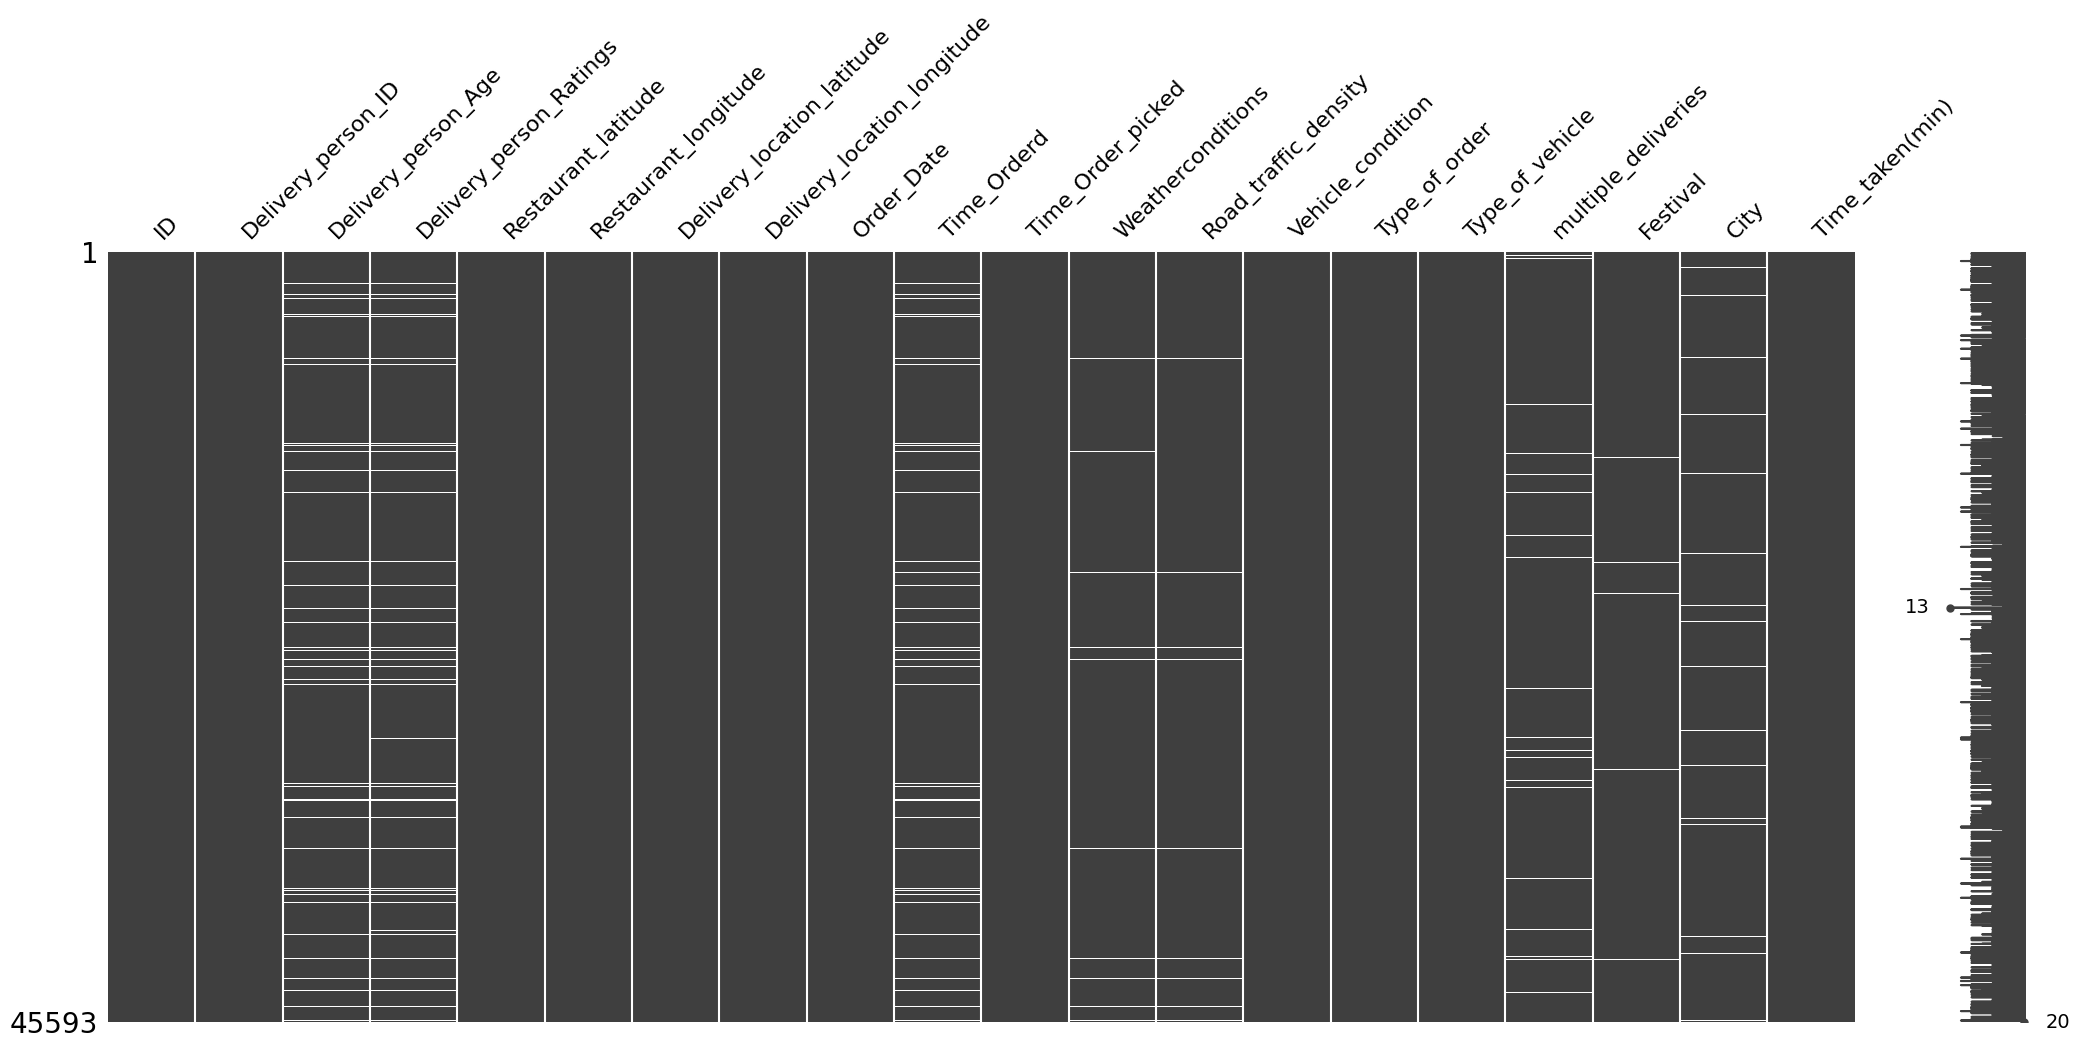

In [ ]:
# missing values analysis
msno.matrix(missing_df)

<Axes: >

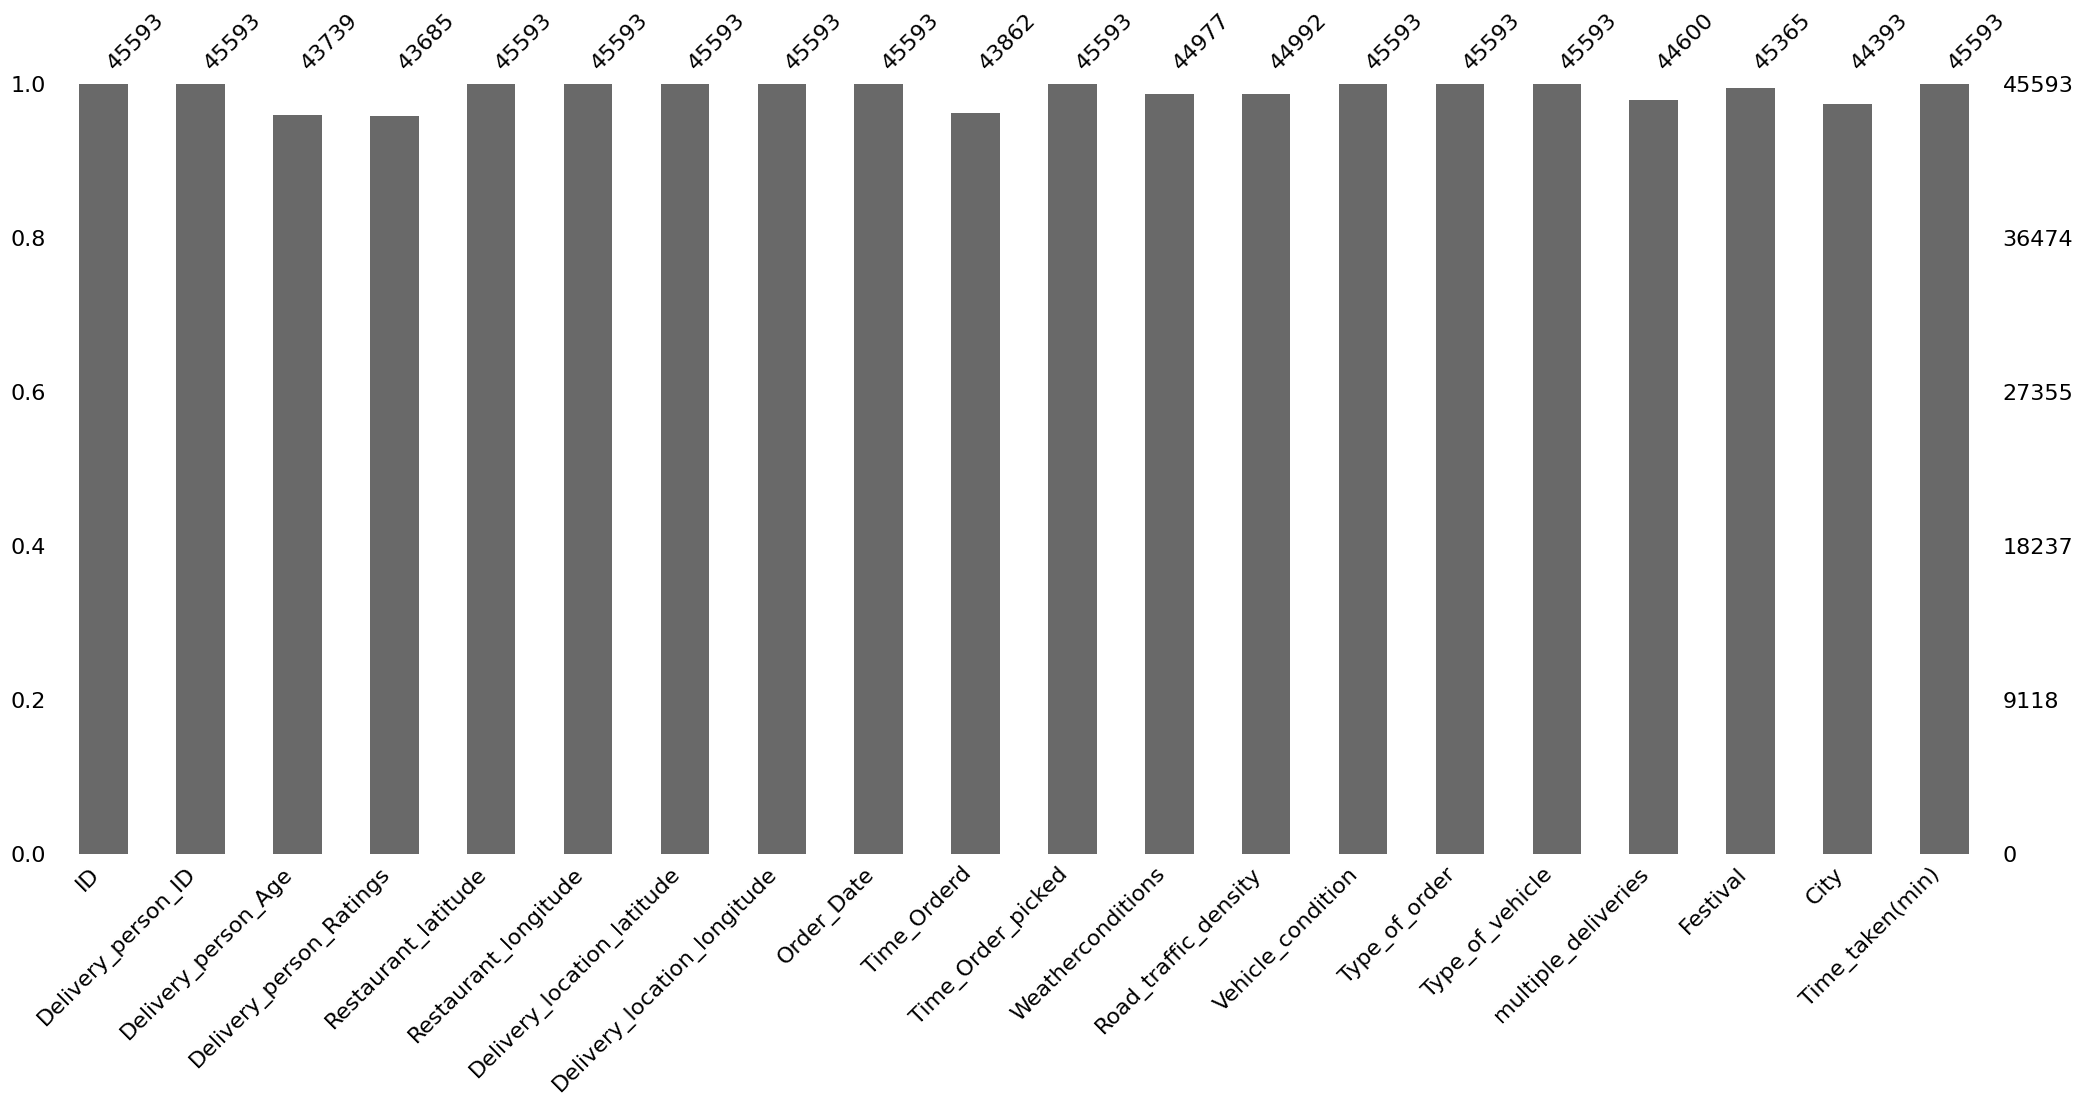

In [ ]:
# count not missing values
msno.bar(missing_df)

<Axes: >

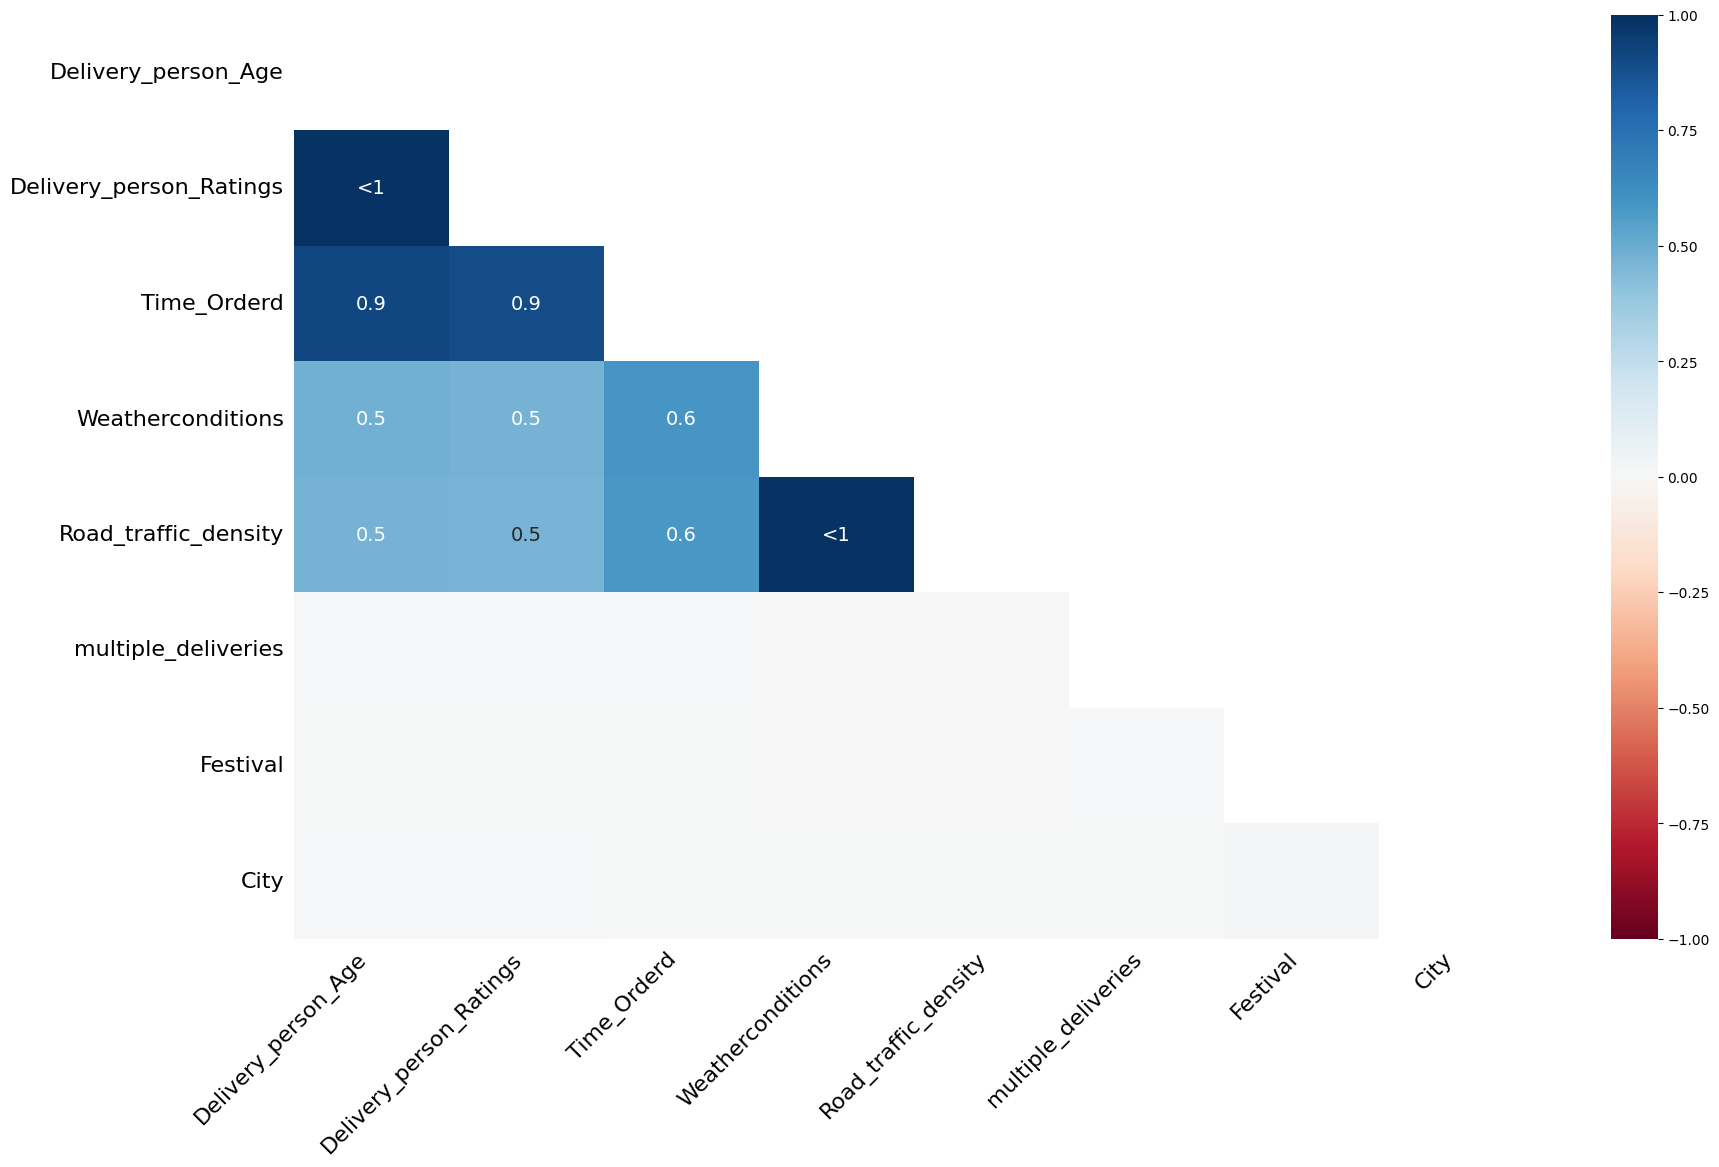

In [ ]:
# missing data correlation
msno.heatmap(missing_df)

**Observations:**
1. The delivery person columns are correlated to each other. This means that missing in these columns is highly related which means lack of rider data.
1. the time ordered column is also related t the rider columns which shows that data might be missing due to some network error where the sysytem was unable to log the rider details and time of order.
1. there is very high correlation between weather pattern and traffic information. Be clear that this does not mean that the road traffic and weather column are correlated. High correlation in misssing means that if value in one column is missing it is  a high chance that it will be missing in others as well.
1. Road traffic density also shows correlation to the rider as it might be provided through the phone of rider(need to investigate).

In [ ]:
missing_df[["Weatherconditions", "Road_traffic_density"]].isna().sum()

,0
Weatherconditions,616
Road_traffic_density,601


In [ ]:
# prove point of missingness
(
    missing_df[["Weatherconditions", "Road_traffic_density"]]
    .isna().all(axis=1)
    .sum()
)/  missing_df[["Weatherconditions", "Road_traffic_density"]].isna().sum()

,0
Weatherconditions,0.975649
Road_traffic_density,1.000000


<Axes: >

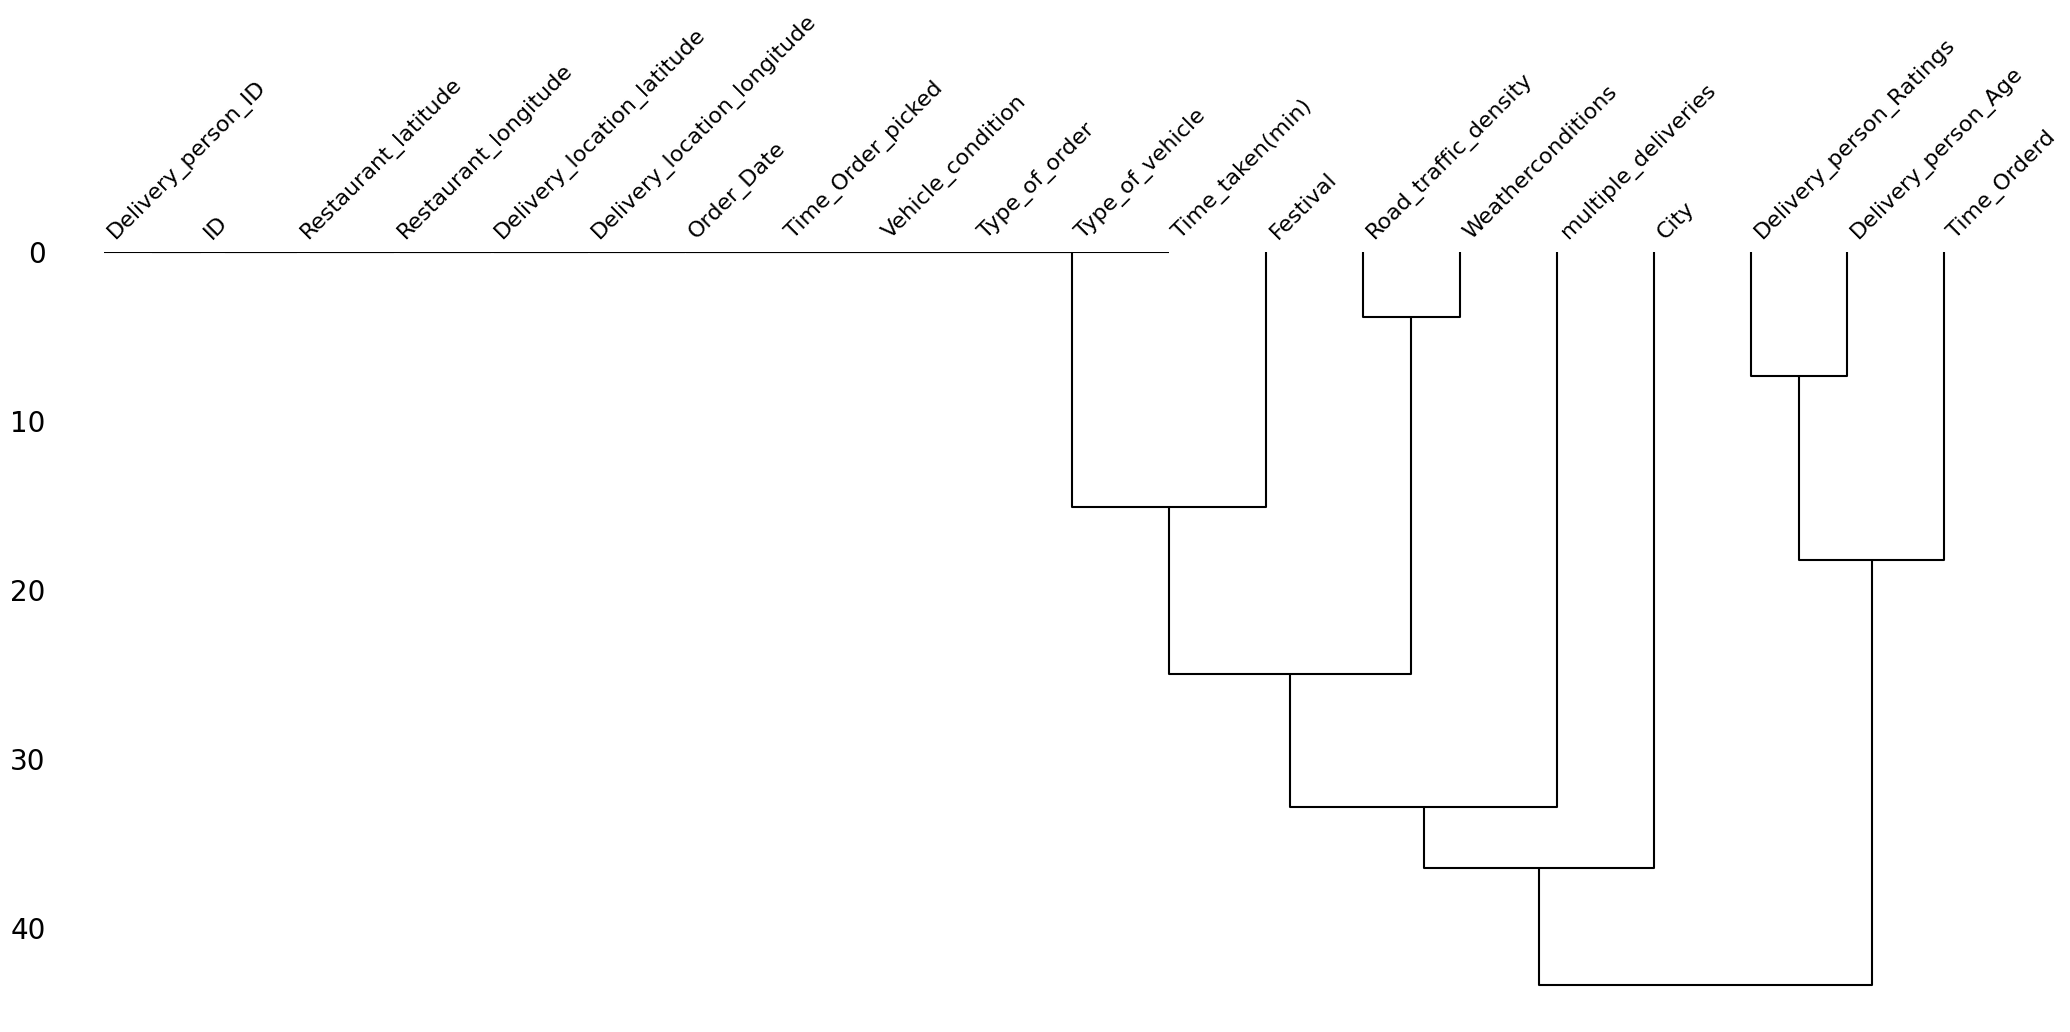

In [ ]:
# Dendrogram of missingness
msno.dendrogram(missing_df)

In [ ]:
# percentage of rows in the data having missing values
(missing_df.isna().any(axis=1).sum()/missing_df.shape[0])*100

9.266773408198627

**About `9%` of the rows in the data having missing values**

## Basic data cleaning

In [ ]:
# columns in the data
df.columns.tolist()

['ID',
 'Delivery_person_ID',
 'Delivery_person_Age',
 'Delivery_person_Ratings',
 'Restaurant_latitude',
 'Restaurant_longitude',
 'Delivery_location_latitude',
 'Delivery_location_longitude',
 'Order_Date',
 'Time_Orderd',
 'Time_Order_picked',
 'Weatherconditions',
 'Road_traffic_density',
 'Vehicle_condition',
 'Type_of_order',
 'Type_of_vehicle',
 'multiple_deliveries',
 'Festival',
 'City',
 'Time_taken(min)']

In [ ]:
def change_column_names(data: pd.DataFrame):
    return (
        data.rename(str.lower, axis=1)
        .rename({
            "delivery_person_id": "rider_id",
            "delivery_person_age": "age",
            "delivery_person_ratings": "ratings",
            "delivery_location_latitude": "delivery_latitude",
            "delivery_location_longitude": "delivery_longitude",
            "time_orderd": "order_time",
            "time_order_picked": "order_picked_time",
            "weatherconditions": "weather",
            "road_traffic_density": "traffic",
            "city": "city_type",
            "time_taken(min)": "time_taken"},axis=1)
    )

In [ ]:
# change column anmes
df = change_column_names(df)

In [ ]:
df.head()

,id,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,order_time,order_picked_time,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [ ]:
# check for duplicate rows
df.drop(columns=["id", "rider_id"]).duplicated().sum()

0

There are no duplicate rows in the data

## Column-wise Cleaning

### ID

In [ ]:
# unique items in the ID columns
print(f"The number of unique IDs are {df['id'].nunique()}")

The number of unique IDs are 45593


**All the IDs are Unique**
This column can be dropped from the data

### Rider ID

In [ ]:
 # unique rider IDs in the column
 df["rider_id"].nunique()

1320

In [ ]:
# rider order count in data
df["rider_id"].value_counts()

,count
rider_id,
PUNERES01DEL01,67
JAPRES11DEL02,67
HYDRES04DEL02,66
JAPRES03DEL01,66
VADRES11DEL02,66
...,...
DEHRES18DEL03,7
AURGRES11DEL03,7
KOLRES09DEL03,6


In [ ]:
# extract city name out of rider_id
(
    df['rider_id']
    .str.split("RES")
    .str.get(0)
    .rename("city_name")
)

,city_name
0,INDO
1,BANG
2,BANG
3,COIMB
4,CHEN
...,...
45588,JAP
45589,AGR
45590,CHEN
45591,COIMB


### Age

In [ ]:
# datatype
df['age'].dtype

dtype('O')

In [55]:
# min, max and mean values
df['age'].astype(float).describe()

,age
count,43739.000000
mean,29.567137
std,5.815155
min,15.000000
25%,25.000000
50%,30.000000
75%,35.000000
max,50.000000


**Minimum Rider age is 15 that is concerning**

Investigate further what type of transport is he using?

<Axes: ylabel='age'>

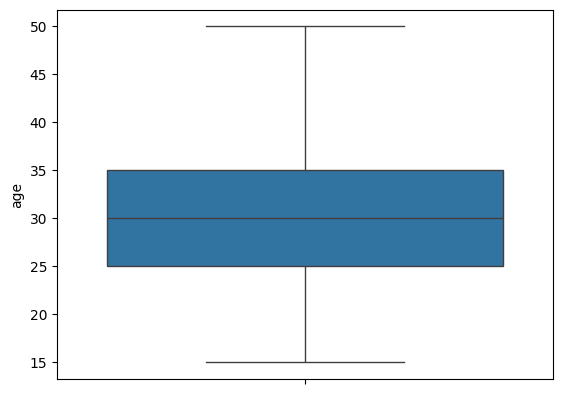

In [54]:
# box plot of the age column
sns.boxplot(df['age'].astype(float))

In [56]:
# rows of data where rider age is less than 18(minor)
minors_data = df.loc[df['age'].astype(float) < 18]
minors_data

,id,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,order_time,order_picked_time,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken
2387,0x564,JAPRES15DEL03,15,1,-26.891191,75.802083,26.981191,75.892083,12-03-2022,NaN,17:20:00,conditions NaN,NaN,3,Meal,motorcycle,0,No,Urban,(min) 15
2905,0xcd0,INDORES010DEL03,15,1,22.750040,75.902847,22.810040,75.962847,03-04-2022,NaN,20:30:00,conditions NaN,NaN,3,Snack,scooter,1,No,Metropolitian,(min) 29
2951,0x91a,SURRES17DEL03,15,1,21.149569,72.772697,21.209569,72.832697,21-03-2022,NaN,22:10:00,conditions NaN,NaN,3,Buffet,bicycle,1,No,Metropolitian,(min) 20
5902,0x474,CHENRES15DEL03,15,1,13.026286,80.275235,13.056286,80.305235,11-03-2022,NaN,20:50:00,conditions NaN,NaN,3,Drinks,bicycle,1,No,Metropolitian,(min) 25
9156,0x73f,BANGRES05DEL01,15,1,12.970324,77.645748,13.080324,77.755748,25-03-2022,NaN,23:25:00,conditions NaN,NaN,3,Buffet,motorcycle,2,No,Metropolitian,(min) 34
10900,0x1b49,MUMRES14DEL02,15,1,19.181300,72.836191,19.231300,72.886191,30-03-2022,NaN,20:55:00,conditions NaN,NaN,3,Buffet,motorcycle,1,No,Metropolitian,(min) 39
11125,0x40b,SURRES12DEL01,15,1,-21.183434,-72.814492,21.193434,72.824492,05-03-2022,NaN,11:30:00,conditions NaN,NaN,3,Meal,scooter,1,No,Urban,(min) 27
12093,0x523,INDORES03DEL02,15,1,22.751857,75.866699,22.801857,75.916699,24-03-2022,NaN,21:15:00,conditions NaN,NaN,3,Buffet,bicycle,0,No,Metropolitian,(min) 28
15124,0x18b0,RANCHIRES02DEL01,15,1,0.000000,0.000000,0.070000,0.070000,16-03-2022,NaN,23:55:00,conditions NaN,NaN,3,Meal,bicycle,1,No,Metropolitian,(min) 21
15927,0x550,CHENRES08DEL02,15,1,13.022394,80.242439,13.072394,80.292439,11-03-2022,NaN,18:10:00,conditions NaN,NaN,3,Snack,bicycle,0,No,Metropolitian,(min) 17


**Observations:**
1. The star ratings of the riders is 1.
1. The vehicle conditions of the these riders is very bad.
1. No weather and traffic conditions available.
1. Age of all these riders is 15 which is below the permissible age to drive a vehicle.
1. Lattitute and Longitude values are in negative which is not possible. India is situated above the equator do all latitude should be positive and east of meridian line so longitude also should be positive as well.

**Seems like  removing this data for now makes more sense than fixing it because a lot of data is missing**

In [57]:
# rows of minors
minor_index = minors_data.index.tolist()
len(minor_index)

38

### Ratings